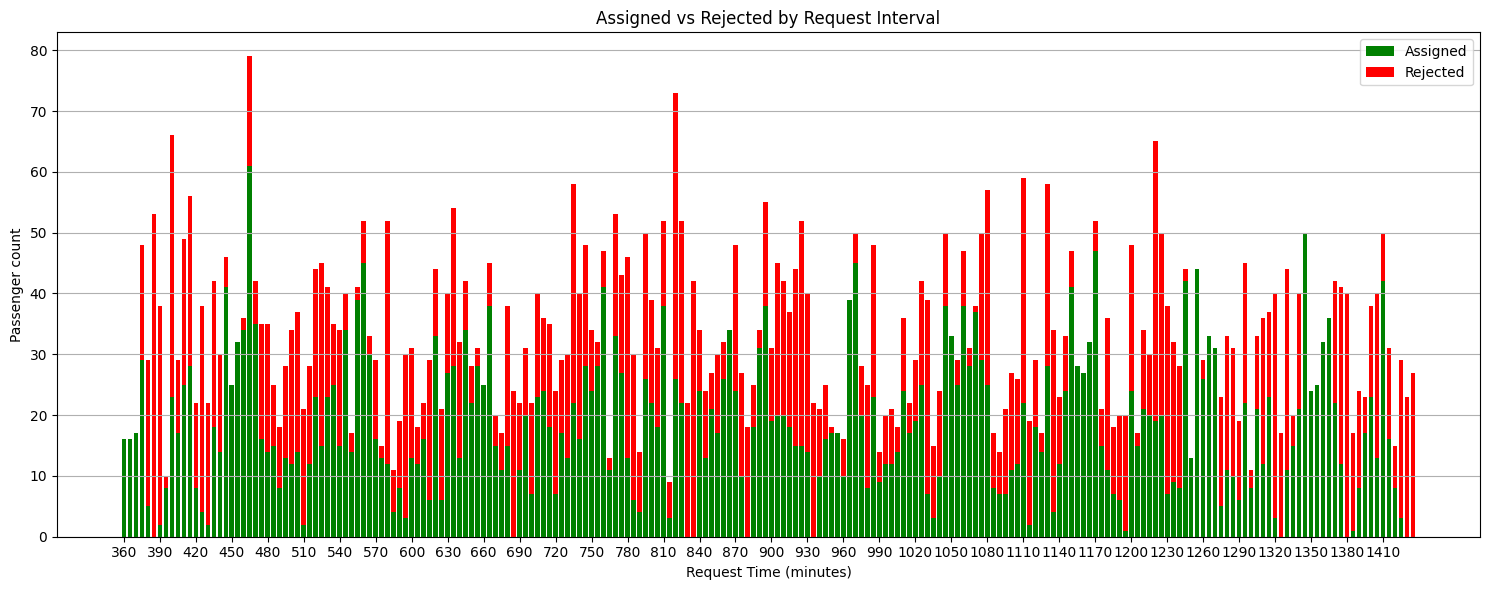

In [8]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

LIVE_DIR = "../live_requests"
ASSIGNMENTS_CSV = "../output/assignments.csv"
SUMMARY_CSV = "../output/passenger_summary_realtime.csv"
PLOT_PATH = "../output/passenger_flow_realtime.png"

INTERVAL = 5
SIM_DURATION = 1440


assignments_df = pd.read_csv(ASSIGNMENTS_CSV)
assigned_ids = set(assignments_df["passenger_id"])


time_labels = list(range(0, SIM_DURATION, INTERVAL))
summary_rows = []

for t in time_labels:
    req_file = os.path.join(LIVE_DIR, f"{t}.json")
    if not os.path.exists(req_file):
        continue

    with open(req_file) as f:
        batch = json.load(f)

    total_requested = 0
    assigned = 0

    for p in batch:
        total_requested += p["count"]
        if p["id"] in assigned_ids:
            assigned += p["count"]

    rejected = total_requested - assigned
    summary_rows.append({
        "interval_start": t,
        "requested_count": total_requested,
        "assigned_count": assigned,
        "rejected_count": rejected
    })


summary_df = pd.DataFrame(summary_rows)


summary_df.to_csv(SUMMARY_CSV, index=False)



plt.figure(figsize=(15, 6))
plt.bar(summary_df["interval_start"], summary_df["assigned_count"], width=4, label="Assigned", color="green")
plt.bar(summary_df["interval_start"], summary_df["rejected_count"], width=4, bottom=summary_df["assigned_count"], label="Rejected", color="red")

plt.xlabel("Request Time (minutes)")
plt.ylabel("Passenger count")
plt.title("Assigned vs Rejected by Request Interval")
plt.legend()
plt.xticks(summary_df["interval_start"][::6])
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig(PLOT_PATH)
plt.show()
